In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score, roc_curve, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Saving creditcarddataset.csv to creditcarddataset.csv


In [2]:
ccd = pd.read_csv('creditcarddataset.csv')

In [3]:
ccd.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
ccd.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
ccd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
print(round(ccd.Class.value_counts()[0]/len(ccd)*100,2), '%')
print(round(ccd.Class.value_counts()[1]/len(ccd)*100,2), '%')
#As you can see the Class variable is imbalanced

99.83 %
0.17 %


In [11]:
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


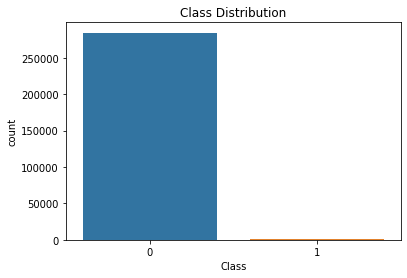

In [6]:
sns.countplot('Class', data= ccd)
plt.title("Class Distribution")
plt.show()
#Shown by this visualization, you can see the imbalance in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


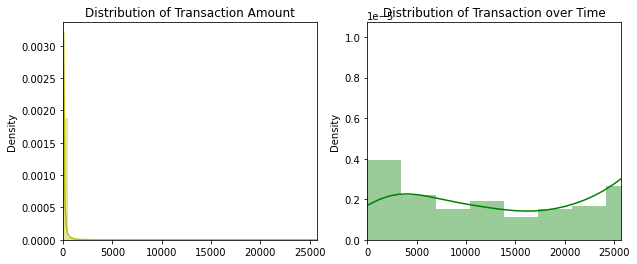

In [45]:
fig,axs = plt.subplots(1,2, figsize = (10,4))

amnt = ccd.Amount.values
time = ccd.Time.values

sns.distplot(amnt, ax = axs[0], color = 'y')
axs[0].set_title("Distribution of Transaction Amount")
axs[0].set_xlim([min(amnt),max(amnt)])

sns.distplot(time, ax=axs[1], color = 'g')
axs[1].set_title("Distribution of Transaction over Time")
axs[1].set_xlim([min(amnt),max(amnt)])
plt.show()

#Time contains the seconds between each transaction from the first transaction in the dataset
#Class is the response variable and statses that 1 is fraud and 0 is not fraud
#Amount is the transaction amount of the credit card purchases.

In [30]:
ccd[['Amount', 'Time']].describe()
#Mean amount is around 88 and standard deviation is around 250. 
#The max amount for a transation was 25, 691.16 and min amount was zero.
#However, the median is only 22, which is a around a quarter of the mean. 
#This signifies that there are outliers and our data is highly skewed, which is affecting the amount and mean.


,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


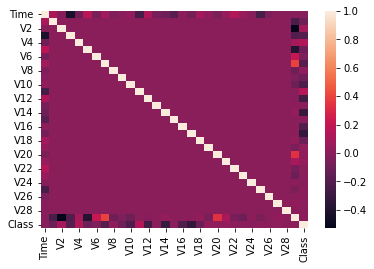

In [27]:
sns.heatmap(ccd.corr())
#Visualizing using the heat map shows the relationship between variables
#As you can see V2, V4, V11, and V19 are all positively correlated. It seems that the higher these values are the more likely it is a fraudulent transaction
#As you can see V10, V12, V14, V17 are all negatively correlated. It seems that the lower these values are, the more likely it is a fraudulent transaction

In [38]:
summaryoffraud = (ccd[ccd['Class'] == 1].describe().transpose().reset_index())

summaryoffraud = summaryoffraud.rename(columns = {"index" : "features"})
summaryoffraud = np.around(summaryoffraud, 3)
summaryoffraud


#Descriptive Stats Fraud Transactions

,features,count,mean,std,min,25%,50%,75%,max
0,Time,492.0,80746.807,47835.365,406.000,41241.500,75568.500,128483.000,170348.000
1,V1,492.0,-4.772,6.784,-30.552,-6.036,-2.342,-0.419,2.132
2,V2,492.0,3.624,4.291,-8.402,1.188,2.718,4.971,22.058
3,V3,492.0,-7.033,7.111,-31.104,-8.643,-5.075,-2.276,2.250
4,V4,492.0,4.542,2.873,-1.313,2.373,4.177,6.349,12.115
5,V5,492.0,-3.151,5.372,-22.106,-4.793,-1.523,0.215,11.095
6,V6,492.0,-1.398,1.858,-6.406,-2.502,-1.425,-0.413,6.474
7,V7,492.0,-5.569,7.207,-43.557,-7.965,-3.034,-0.946,5.803
8,V8,492.0,0.571,6.798,-41.044,-0.195,0.622,1.765,20.007
9,V9,492.0,-2.581,2.501,-13.434,-3.872,-2.209,-0.788,3.354


In [39]:
summaryofnonfraud = (ccd[ccd['Class'] == 0].describe().transpose().reset_index())

summaryofnonfraud = summaryofnonfraud.rename(columns = {"index" : "features"})
summaryofnonfraud = np.around(summaryofnonfraud, 3)
summaryofnonfraud

#Descriptive Stats of Non-Fraud Transactions
#The Dataset has 492 Frauds out of 284,315 transactions. It is highly unbalanced, with only 0.173% of transactions being fraudulent.

,features,count,mean,std,min,25%,50%,75%,max
0,Time,284315.0,94838.202,47484.016,0.000,54230.000,84711.000,139333.000,172792.000
1,V1,284315.0,0.008,1.930,-56.408,-0.918,0.020,1.316,2.455
2,V2,284315.0,-0.006,1.636,-72.716,-0.599,0.064,0.800,18.902
3,V3,284315.0,0.012,1.459,-48.326,-0.885,0.182,1.028,9.383
4,V4,284315.0,-0.008,1.399,-5.683,-0.850,-0.022,0.738,16.875
5,V5,284315.0,0.005,1.357,-113.743,-0.689,-0.053,0.612,34.802
6,V6,284315.0,0.002,1.330,-26.161,-0.767,-0.273,0.400,73.302
7,V7,284315.0,0.010,1.179,-31.765,-0.551,0.041,0.571,120.589
8,V8,284315.0,-0.001,1.161,-73.217,-0.209,0.022,0.326,18.709
9,V9,284315.0,0.004,1.089,-6.291,-0.640,-0.050,0.598,15.595


In [43]:
ccd[(ccd['Class'] == 1)]['Amount'].value_counts().head(10)
#This shows that 113 of the fraudulent transactions are one dollar, 27 are 99.99 dollars and 27 are zero. 
#The zero could be due an account verification method that credit cards used to verify a cardholders information without charging the customer.

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
1.10       3
2.28       3
Name: Amount, dtype: int64

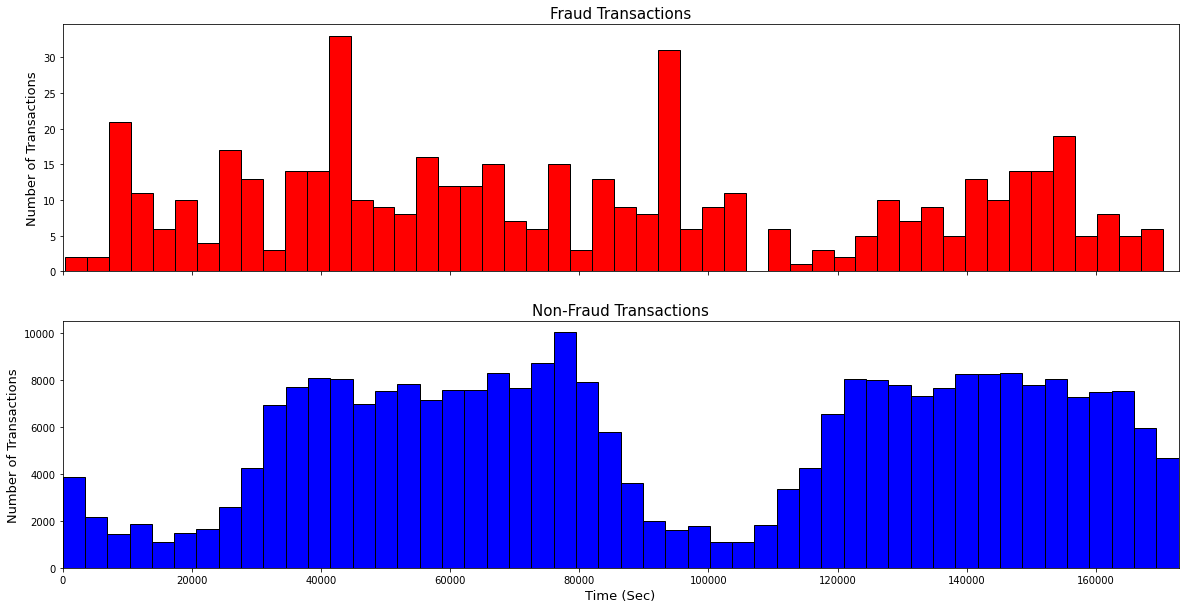

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (20,10))

fraudtransactions = ccd.Time[ccd.Class == 1]
nonfraudtransations = ccd.Time[ccd.Class == 0]

ax1.hist(fraudtransactions, bins= 50, color = 'red', edgecolor = "black")
ax1.set_xlim([min(fraudtransactions), max(fraudtransactions)])
ax1.set_title('Fraud Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, color='blue', edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Non-Fraud Transactions',  fontsize=15)

ax2.set_xlabel('Time (Sec)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()



In [56]:
#Converting seconds to hours and mins to see if there are any additional info

timeconversion = pd.to_timedelta(ccd['Time'], unit = 's')

ccd['mins'] = (timeconversion.dt.components.minutes).astype(int)
ccd['hours'] = (timeconversion.dt.components.hours).astype(int)

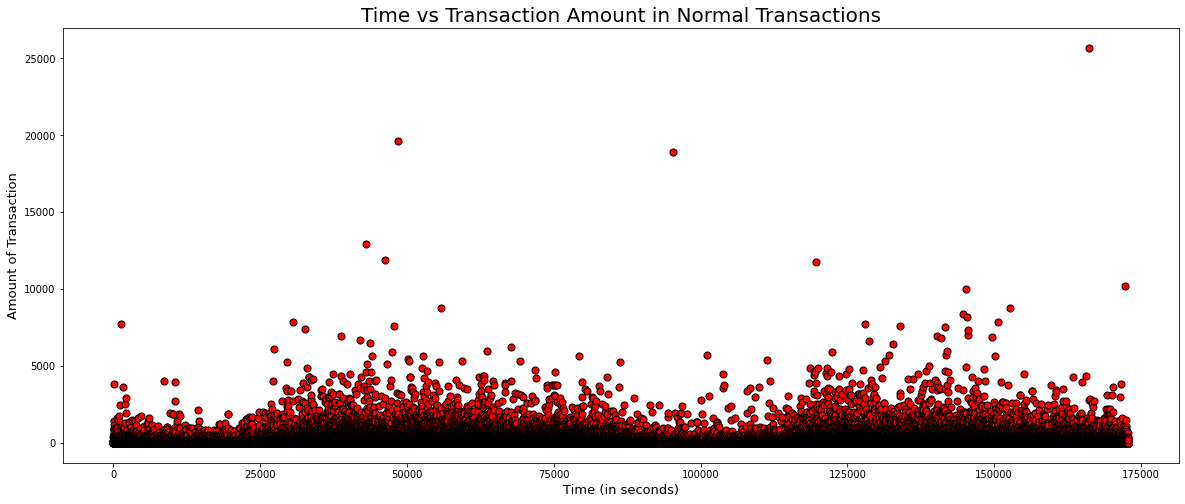

In [62]:
plt.figure(figsize=(20,8))

fig = plt.scatter(x=ccd[ccd['Class'] == 0]['Time'], y=ccd[ccd['Class'] == 0]['Amount'], color="red", s=50, edgecolor='black')
plt.title("Time vs Transaction Amount in Normal Transactions", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

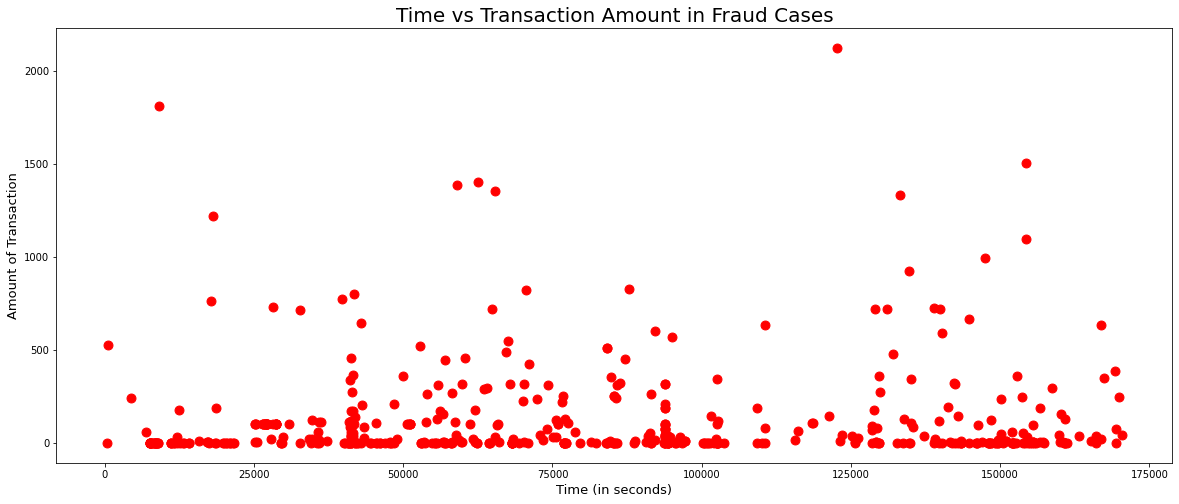

In [65]:
plt.figure(figsize=(20,8))

fig = plt.scatter(x=ccd[ccd['Class'] == 1]['Time'], y=ccd[ccd['Class'] == 1]['Amount'], color="r", s=80)
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

#In Fraudlent, there appears to be more outliers compared to non-fraudulent transactions and does not seem to have any inherent patters.

#In Non-Fraudulent, there are less outliers compared to fraudulent transactions, there are alot of transactions with amount less than 5000.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


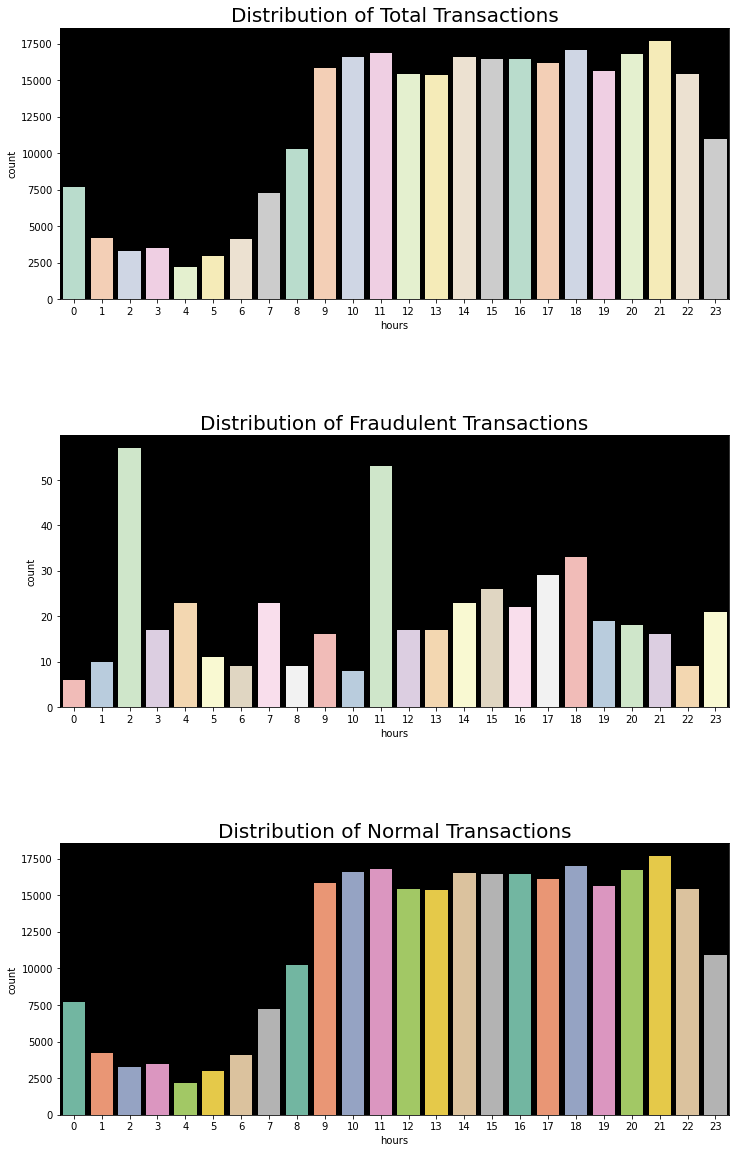

In [59]:
fig, axs = plt.subplots(3, figsize=(12,20))

fig.subplots_adjust(hspace=.5)

sns.countplot(ccd['hours'], ax = axs[0], palette="Pastel2")
axs[0].set_title("Distribution of Total Transactions",fontsize=20)
axs[0].set_facecolor("black")

sns.countplot(ccd[(ccd['Class'] == 1)]['hours'], ax=axs[1], palette='Pastel1')
axs[1].set_title("Distribution of Fraudulent Transactions", fontsize=20)
axs[1].set_facecolor('black')

sns.countplot(ccd[(ccd['Class'] == 0)]['hours'], ax=axs[2], palette='Set2')
axs[2].set_title("Distribution of Normal Transactions", fontsize=20)
axs[2].set_facecolor("black")

plt.show()